In [1]:
import os
import matplotlib.pyplot as plt
import pandas
import seaborn

In [2]:
### Download scripts from figshare
!( \
if [ ! -d ./scripts ]; then \
wget https://figshare.com/ndownloader/files/44297132?private_link=9b9e89ff3150aebb6d7a -O ./scripts.zip; \
unzip scripts.zip; rm scripts.zip; \
fi)

In [3]:
from scripts.add_gene_tile_info import add_gene_info
import scripts.utils_GWAS as utils_GWAS
import scripts.utils_eQTL as utils_eQTL
import scripts.utils_RegulomeDB as utils_RegulomeDB
from scripts.plot_ldsc_joint import plot_ldsc_all

In [4]:
# make tmp directory
os.makedirs("./tmp/", exist_ok=True)
os.makedirs("./scarlink_outs/", exist_ok=True)

### Download data files and SCARlink models from figshare

In [5]:
# Data files
!( \
if [ ! -d ./fig_data ]; then \
wget https://figshare.com/ndownloader/files/44312828?private_link=9b9e89ff3150aebb6d7a -O ./fig_data.zip; \
unzip fig_data.zip; rm fig_data.zip; \
fi)

In [6]:
# PBMC
!( \
if [ ! -d ./scarlink_outs/pbmc_all_out_10k ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297825?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_all_out_10k.zip; \
unzip pbmc_all_out_10k.zip; rm pbmc_all_out_10k.zip; \
fi)

In [7]:
# Pancreas
!( \
if [ ! -d ./scarlink_outs/panc_p1_all_out_10k ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297267?private_link=9b9e89ff3150aebb6d7a -O ./panc_p1_all_out_10k.zip; \
unzip panc_p1_all_out_10k.zip; rm panc_p1_all_out_10k.zip; \
fi)

In [8]:
# Pituitary
!( \
if [ ! -d ./scarlink_outs/pituitary_all_out_10k ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44313044?private_link=9b9e89ff3150aebb6d7a -O ./pituitary_all_out_10k.zip; \
unzip pituitary_all_out_10k.zip; rm pituitary_all_out_10k.zip; \
fi)

In [9]:
# PBMC with tile accessibility downsampled to 33%
!( \
if [ ! -d ./scarlink_outs/pbmc_10k_down_33 ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297252?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_10k_down_33.zip; \
unzip pbmc_10k_down_33.zip; rm pbmc_10k_down_33.zip; \
fi)

In [10]:
# PBMC with tile accessibility downsampled to 66%
!( \
if [ ! -d ./scarlink_outs/pbmc_10k_down_66 ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297243?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_10k_down_66.zip; \
unzip pbmc_10k_down_66.zip; rm pbmc_10k_down_66.zip; \
fi)

In [11]:
# PBMC with tile accessibility and gene expression downsampled to 33%
!( \
if [ ! -d ./scarlink_outs/pbmc_10k_down_33_both ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297258?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_10k_down_33_both.zip; \
unzip pbmc_10k_down_33_both.zip; rm pbmc_10k_down_33_both.zip; \
fi)

In [12]:
# PBMC with tile accessibility and gene expression downsampled to 66%
!( \
if [ ! -d ./scarlink_outs/pbmc_10k_down_66_both ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44314964?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_10k_down_66_both.zip; \
unzip pbmc_10k_down_66_both.zip; rm pbmc_10k_down_66_both.zip; \
fi)

In [13]:
# PBMC with gene expression downsampled to 33%
!( \
if [ ! -d ./scarlink_outs/pbmc_10k_down_33_rna ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297255?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_10k_down_33_rna.zip; \
unzip pbmc_10k_down_33_rna.zip; rm pbmc_10k_down_33_rna.zip; \
fi)

In [14]:
# PBMC with gene expression downsampled to 66%
!( \
if [ ! -d ./scarlink_outs/pbmc_10k_down_66_rna ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297246?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_10k_down_66_rna.zip; \
unzip pbmc_10k_down_66_rna.zip; rm pbmc_10k_down_66_rna.zip; \
fi)

### Download necessary files

In [15]:
# download hg38 GTF 
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.refGene.gtf.gz -O ./tmp/hg38.refGene.gtf.gz

# download LD
!wget https://raw.githubusercontent.com/jmacdon/LDblocks_GRCh38/master/data/pyrho_EUR_LD_blocks.bed -O ./tmp/pyrho_EUR_LD_blocks.bed

# download and extract splicing QTL
!wget https://storage.googleapis.com/adult-gtex/bulk-qtl/v8/single-tissue-cis-qtl/GTEx_Analysis_v8_sQTL.tar -O ./tmp/GTEx_Analysis_v8_sQTL.tar
!tar -xvf ./tmp/GTEx_Analysis_v8_sQTL.tar --directory ./tmp/

# UK Biobank
!wget https://www.dropbox.com/s/cdsdgwxkxkcq8cn/UKBB_94traits_release1.1.tar.gz -O ./tmp/UKBB_94traits_release1.1.tar.gz
!tar -xvzf ./tmp/UKBB_94traits_release1.1.tar.gz --directory ./tmp/

# RegulomeDB
!wget https://www.encodeproject.org/files/ENCFF250UJY/@@download/ENCFF250UJY.tsv -O ./tmp/ENCFF250UJY.tsv

--2024-01-30 17:28:13--  https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.refGene.gtf.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23614606 (23M) [application/x-gzip]
Saving to: ‘./tmp/hg38.refGene.gtf.gz’

100%[======================================>] 23,614,606  20.3MB/s   in 1.1s   

2024-01-30 17:28:15 (20.3 MB/s) - ‘./tmp/hg38.refGene.gtf.gz’ saved [23614606/23614606]

--2024-01-30 17:28:16--  https://raw.githubusercontent.com/jmacdon/LDblocks_GRCh38/master/data/pyrho_EUR_LD_blocks.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31840 (31K) [te

In [16]:
# inputs
gtf_file = "./tmp/hg38.refGene.gtf.gz"
ld_file = './tmp/pyrho_EUR_LD_blocks.bed'
ukbb_file = './tmp/release1.1/UKBB_94traits_release1.bed.gz'
common_snp_file = './fig_data/1000G.csv.gz'
sqtl_dir = './tmp/GTEx_Analysis_v8_sQTL/'
regdb_file = './tmp/ENCFF250UJY.tsv'

In [17]:
# ArchR peak2gene links
pbmc_peak_file = "./fig_data/pbmc_peak_gene_links.csv.gz"
panc_peak_file = "./fig_data/panc_peak_gene_links.csv.gz"
pit_peak_file = "./fig_data/pit_peak_gene_links.csv.gz"

In [18]:
# GTEx eQTL input files
blood_gtex_file = "./fig_data/whole_blood_gtex.txt.gz"
panc_gtex_file = "./fig_data/pancreas_gtex.txt.gz"
pit_gtex_file = "./fig_data/pituitary_gtex.txt.gz"

# Independent eQTL input files
blood_ind_eqtl_file = "./fig_data/Whole_Blood.v8.independent_eqtls_gene_name.csv.gz"
panc_ind_eqtl_file = "./fig_data/Pancreas.v8.independent_eqtls_gene_name.csv.gz"
pit_ind_eqtl_file = "./fig_data/Pituitary.v8.independent_eqtls_gene_name.csv.gz"

In [19]:
# PBMC
pbmc_scarlink_out = "./scarlink_outs/pbmc_all_out_10k/"
pbmc_celltype_file = pbmc_scarlink_out + "gene_linked_tiles_celltype.csv.gz" # scarlink_tiles output
pbmc_ann_celltype_file = pbmc_scarlink_out + "gene_linked_tiles_celltype_ann_hvg.csv.gz"

# Pancreas
panc_scarlink_out = "./scarlink_outs/panc_p1_all_out_10k/"
panc_celltype_file = panc_scarlink_out + "gene_linked_tiles_celltype.csv.gz" # scarlink_tiles output
panc_ann_celltype_file = panc_scarlink_out + "gene_linked_tiles_celltype_ann_hvg.csv.gz"

# Pituitary
pit_scarlink_out = "./scarlink_outs/pituitary_all_out_10k/"
pit_celltype_file = pit_scarlink_out + "gene_linked_tiles_celltype.csv.gz"
pit_ann_celltype_file = pit_scarlink_out + "gene_linked_tiles_celltype_ann_hvg.csv.gz"

### Annotate tiles as downstream, promoter proximal, gene body, or distal

In [20]:
add_gene_info(pbmc_scarlink_out, pbmc_celltype_file, gtf_file, pbmc_ann_celltype_file)
add_gene_info(panc_scarlink_out, panc_celltype_file, gtf_file, panc_ann_celltype_file)
add_gene_info(pit_scarlink_out, pit_celltype_file, gtf_file, pit_ann_celltype_file)

N genes: 777
Iter 0
Iter 100
Iter 200
Iter 300
Iter 400
Iter 500
Iter 600
Iter 700
N genes: 1215
Iter 0
Iter 100
Iter 200
Iter 300
Iter 400
Iter 500
Iter 600
Iter 700
Iter 800
Iter 900
Iter 1000
Iter 1100
Iter 1200


### GWAS 

In [21]:
pbmc_ukbb_file = "./tmp/pbmc_ukbb.csv.gz"
panc_ukbb_file = "./tmp/panc_ukbb.csv.gz"
pit_ukbb_file = "./tmp/pit_ukbb.csv.gz"

In [22]:
utils_GWAS.merge_tiles_peaks(ukbb_file, common_snp_file, ld_file, gtf_file, 
                                              pbmc_ann_celltype_file, pbmc_peak_file, tissue='PBMC', celltype_col='celltype', 
                                                 outfile=pbmc_ukbb_file)

utils_GWAS.merge_tiles_peaks(ukbb_file, common_snp_file, ld_file, gtf_file, 
                                              panc_ann_celltype_file, panc_peak_file, tissue='Pancreas', celltype_col='celltype', 
                                                 outfile=panc_ukbb_file)

utils_GWAS.merge_tiles_peaks(ukbb_file, common_snp_file, ld_file, gtf_file, 
                                              pit_ann_celltype_file, pit_peak_file, tissue='Pituitary', celltype_col='celltype', 
                                                 outfile=pit_ukbb_file)

N traits: (82, 2)


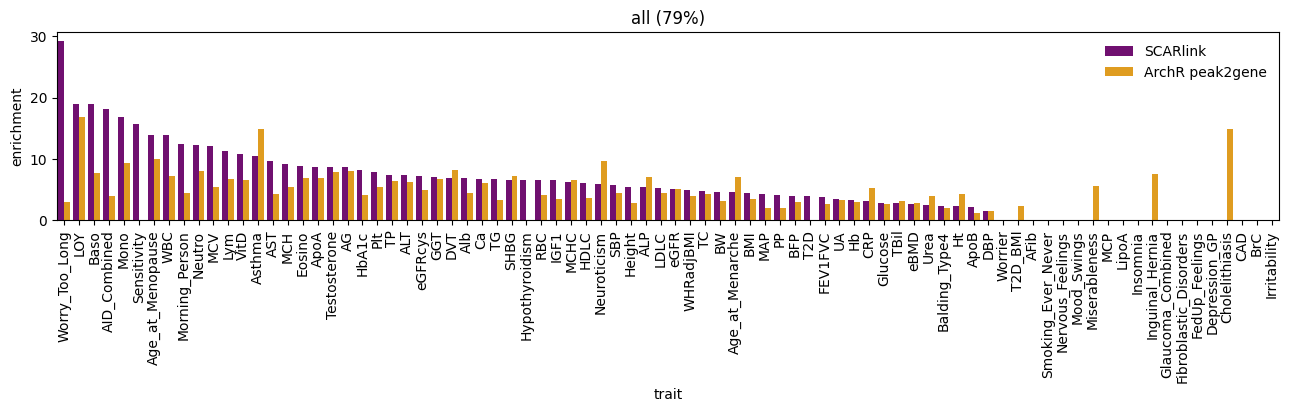

In [23]:
utils_GWAS.plot_gwas_traits([pbmc_ukbb_file, panc_ukbb_file, pit_ukbb_file], 
                                                       ukbb_file, sqtl_dir, 'all')
plt.savefig('./tmp/gwas_traits_all.pdf', transparent=True)

N traits: (82, 2)


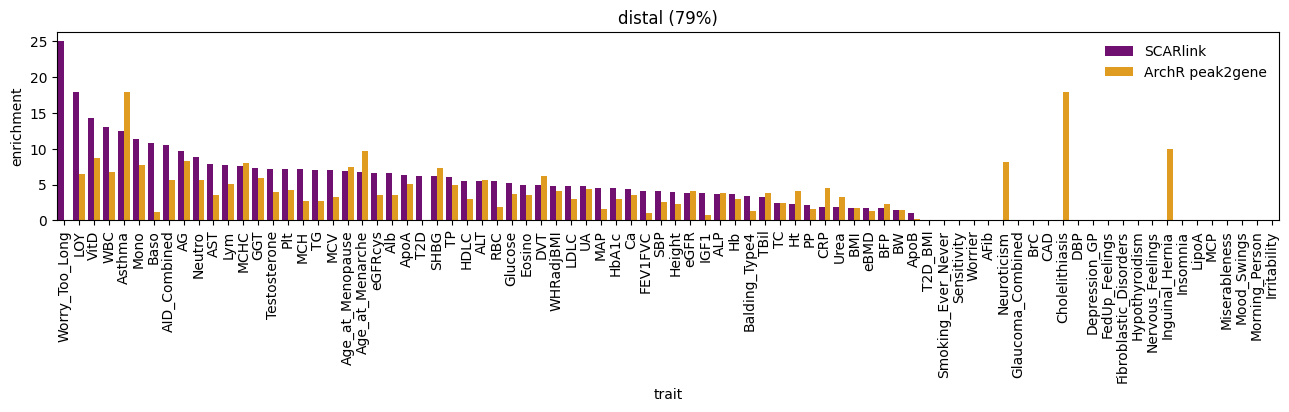

In [24]:
utils_GWAS.plot_gwas_traits([pbmc_ukbb_file, panc_ukbb_file, pit_ukbb_file], 
                                                       ukbb_file, sqtl_dir, 'distal')
plt.savefig('./tmp/gwas_traits_distal.pdf', transparent=True)

N traits: (82, 2)


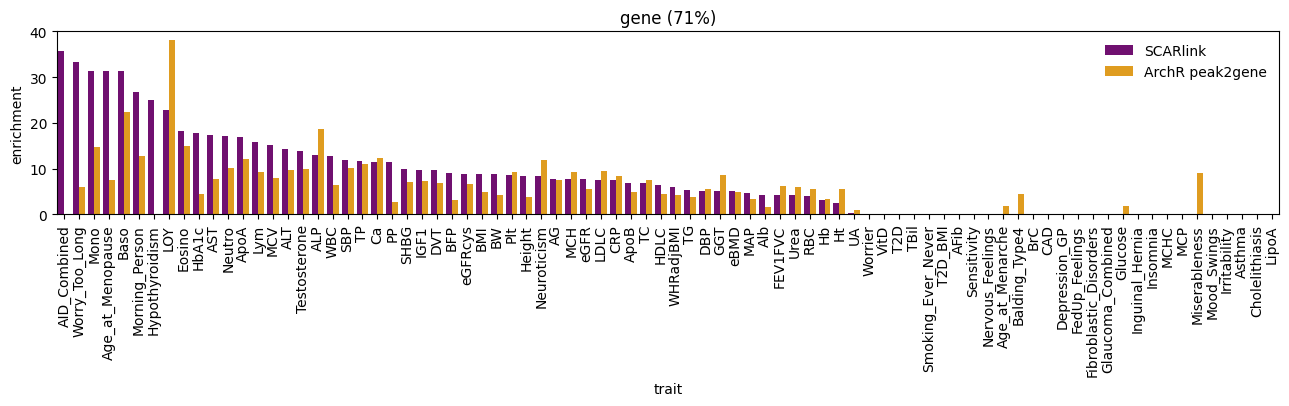

In [25]:
utils_GWAS.plot_gwas_traits([pbmc_ukbb_file, panc_ukbb_file, pit_ukbb_file], 
                                                       ukbb_file, sqtl_dir, 'gene')
plt.savefig('./tmp/gwas_traits_gene.pdf', transparent=True)

N traits: (82, 2)


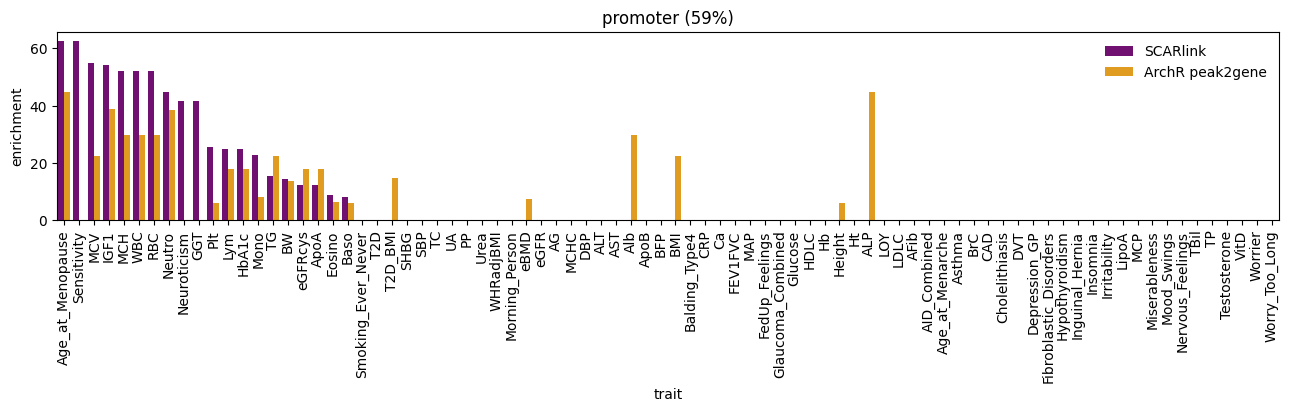

In [26]:
utils_GWAS.plot_gwas_traits([pbmc_ukbb_file, panc_ukbb_file, pit_ukbb_file], 
                                                       ukbb_file, sqtl_dir, 'promoter')
plt.savefig('./tmp/gwas_traits_promoter.pdf', transparent=True)

## eQTL

#### GTEx

In [27]:
pit_pbmc_gtex_outfile = "./tmp/pit_pbmc_gtex.csv.gz"
pit_panc_gtex_outfile = "./tmp/pit_panc_gtex.csv.gz"
pit_gtex_outfile = "./tmp/pit_gtex.csv.gz"

In [28]:
utils_eQTL.merge_common_tile_peaks(blood_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Whole blood',
                                   outfile=pit_pbmc_gtex_outfile)
utils_eQTL.merge_common_tile_peaks(panc_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Pancreas',
                                   outfile=pit_panc_gtex_outfile)
utils_eQTL.merge_common_tile_peaks(pit_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Pituitary',
                                   outfile=pit_gtex_outfile)

n vars: 150 88 38
PBMC
p-value: 0.25439999999999996
Pancreas
p-value: 0.6163999999999998
Pituitary
p-value: 0.3936


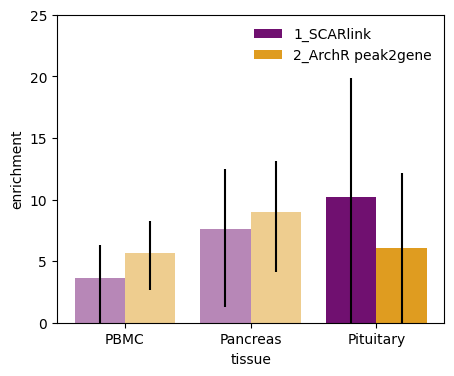

In [29]:
utils_eQTL.compare_enrichment_recall_tissue(pit_pbmc_gtex_outfile, pit_panc_gtex_outfile, pit_gtex_outfile, 
                                            o0="PBMC", o1="Pancreas", o2="Pituitary", p_cutoff=1e-3,
                                            alphas=[0.5, 0.5, 1])
plt.ylim((0, 25))
plt.savefig('./tmp/gtex_pit_tiles.pdf', transparent=True)

#### Independent eQTL

In [30]:
pbmc_ind_eqtl_outfile = "./tmp/pbmc_ind_eqtl.csv.gz"
panc_ind_eqtl_outfile = "./tmp/panc_ind_eqtl.csv.gz"
pit_ind_eqtl_outfile = "./tmp/pit_ind_eqtl.csv.gz"

In [31]:
utils_eQTL.merge_common_tile_peaks(blood_ind_eqtl_file, common_snp_file, ld_file, gtf_file, 
                                   pbmc_ann_celltype_file, pbmc_peak_file, celltype_col='celltype', tissue='PBMC',
                                   outfile=pbmc_ind_eqtl_outfile, neg_pip=True)
utils_eQTL.merge_common_tile_peaks(panc_ind_eqtl_file, common_snp_file, ld_file, gtf_file, 
                                   panc_ann_celltype_file, panc_peak_file, celltype_col='celltype', tissue='Pancreas',
                                   outfile=panc_ind_eqtl_outfile, neg_pip=True)
utils_eQTL.merge_common_tile_peaks(pit_ind_eqtl_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Pituitary',
                                   outfile=pit_ind_eqtl_outfile, neg_pip=True)

n vars: 962 335 218
PBMC
p-value: 0.0
Pancreas
p-value: 0.0148
Pituitary
p-value: 0.21719999999999998


(0.0, 16.0)

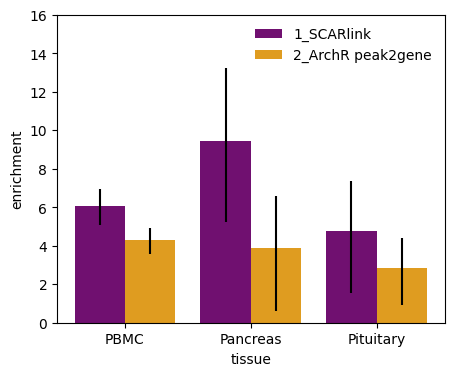

In [32]:
# all independent eQTL
utils_eQTL.compare_enrichment_recall_tissue(pbmc_ind_eqtl_outfile, panc_ind_eqtl_outfile, pit_ind_eqtl_outfile, 
                                            o0="PBMC", o1="Pancreas", o2="Pituitary", p_cutoff=1e-3, pip=-100)
plt.ylim((0, 16))

### RegulomeDB

In [33]:
panc_regdb_outfile = "./tmp/panc_regdb.csv.gz"
pit_regdb_outfile = "./tmp/pit_regdb.csv.gz"

In [34]:
utils_RegulomeDB.merge_tiles_peaks(regdb_file, common_snp_file, ld_file, gtf_file, 
                                   panc_ann_celltype_file, panc_peak_file, celltype_col='celltype', tissue='Pancreas',
                                   outfile=panc_regdb_outfile)
utils_RegulomeDB.merge_tiles_peaks(regdb_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Pituitary',
                                   outfile=pit_regdb_outfile)

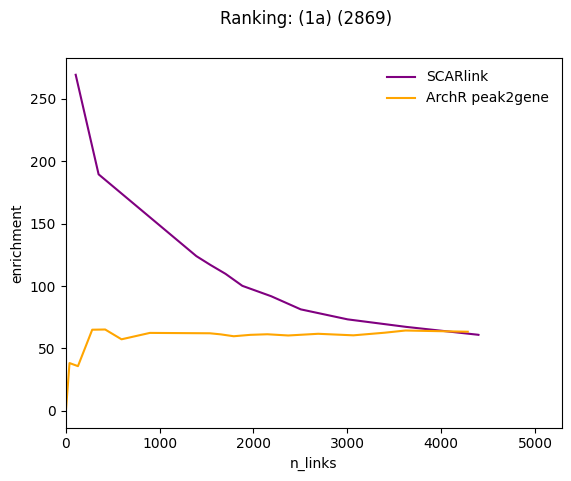

In [35]:
utils_RegulomeDB.plot_n_e_r(panc_regdb_outfile, pip=0.9, cutoff=0.5, ranking=['1a'])
plt.savefig('./tmp/panc_regdb.pdf', transparent=True)

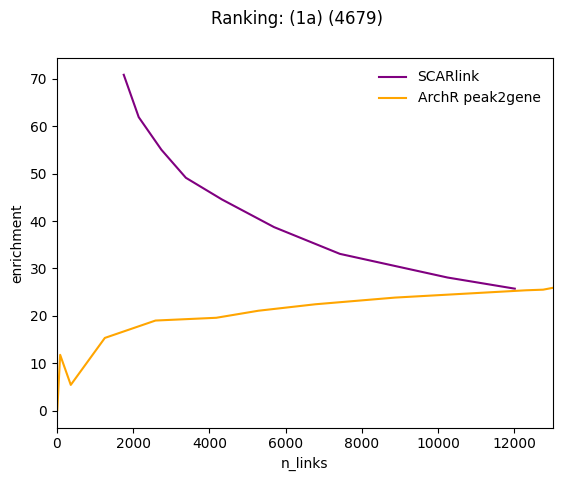

In [36]:
utils_RegulomeDB.plot_n_e_r(pit_regdb_outfile, pip=0.9, cutoff=0.5, ranking=['1a'])
plt.savefig('./tmp/pit_regdb.pdf', transparent=True)

### S-LDSC plot

In [37]:
ldsc_tbl_marginal_file = './fig_data/ldsc_tbl_common_genes_marginal.csv'
ldsc_tbl_joint_file = './fig_data/ldsc_tbl_common_genes_joint.csv'

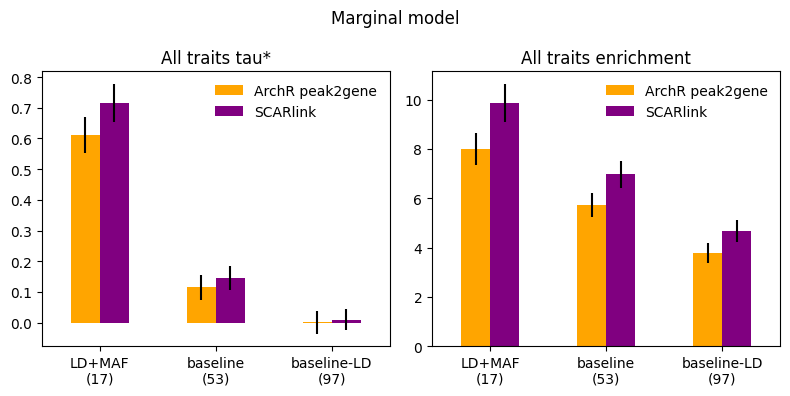

In [38]:
plot_ldsc_all(ldsc_tbl_marginal_file, "Marginal model")

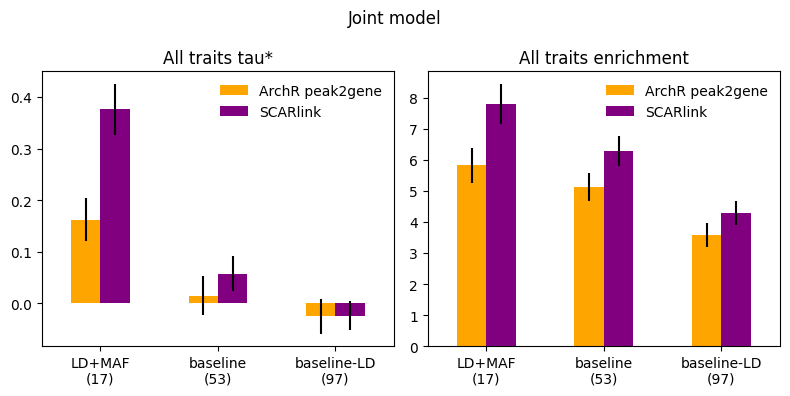

In [39]:
plot_ldsc_all(ldsc_tbl_joint_file, "Joint model")

## Downsampling comparison

In [40]:
pbmc_tiles_33_file = './scarlink_outs/pbmc_10k_down_33/gene_linked_tiles_celltype.csv.gz'
pbmc_tiles_66_file = './scarlink_outs/pbmc_10k_down_66/gene_linked_tiles_celltype.csv.gz'
pbmc_tiles_33_both_file = './scarlink_outs/pbmc_10k_down_33_both/gene_linked_tiles_celltype.csv.gz'
pbmc_tiles_66_both_file = './scarlink_outs/pbmc_10k_down_66_both/gene_linked_tiles_celltype.csv.gz'
pbmc_tiles_33_rna_file = './scarlink_outs/pbmc_10k_down_33_rna/gene_linked_tiles_celltype.csv.gz'
pbmc_tiles_66_rna_file = './scarlink_outs/pbmc_10k_down_66_rna/gene_linked_tiles_celltype.csv.gz'
pbmc_tiles_all_file = './scarlink_outs/pbmc_all_out_10k/gene_linked_tiles_celltype.csv.gz'
hvg_pbmc_file = "./scarlink_outs/pbmc_all_out_10k/hvg.txt"

In [41]:
hvg_pbmc = pandas.read_csv(hvg_pbmc_file, sep='\t', header=None)[0].values

In [42]:
pbmc_tiles_33 = pandas.read_csv(pbmc_tiles_33_file, sep='\t')
pbmc_tiles_66 = pandas.read_csv(pbmc_tiles_66_file, sep='\t')
pbmc_tiles_33_both = pandas.read_csv(pbmc_tiles_33_both_file, sep='\t')
pbmc_tiles_66_both = pandas.read_csv(pbmc_tiles_66_both_file, sep='\t')
pbmc_tiles_33_rna = pandas.read_csv(pbmc_tiles_33_rna_file, sep='\t')
pbmc_tiles_66_rna = pandas.read_csv(pbmc_tiles_66_rna_file, sep='\t')
pbmc_tiles_all = pandas.read_csv(pbmc_tiles_all_file, sep='\t')

In [43]:
def get_n_tiles(df, hvg):
    df = df[(df['z-score'] > 0.5) & 
        (df['FDR'] < 0.001) & (df['gene'].isin(hvg_pbmc)) & 
        (df['Spearman corr'] > 0.1)][['gene', 'chr', 'start', 'end']].drop_duplicates()
    n_tiles = df.shape[0]
    return n_tiles

In [44]:
pbmc_33_n_tiles = get_n_tiles(pbmc_tiles_33, hvg_pbmc)
pbmc_66_n_tiles = get_n_tiles(pbmc_tiles_66, hvg_pbmc)
pbmc_33_rna_n_tiles = get_n_tiles(pbmc_tiles_33_rna, hvg_pbmc)
pbmc_66_rna_n_tiles = get_n_tiles(pbmc_tiles_66_rna, hvg_pbmc)
pbmc_33_both_n_tiles = get_n_tiles(pbmc_tiles_33_both, hvg_pbmc)
pbmc_66_both_n_tiles = get_n_tiles(pbmc_tiles_66_both, hvg_pbmc)
pbmc_all_n_tiles = get_n_tiles(pbmc_tiles_all, hvg_pbmc)

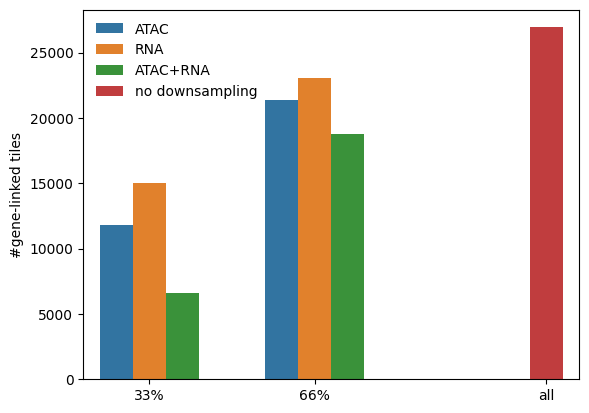

In [45]:
counts = [pbmc_33_n_tiles, pbmc_66_n_tiles, pbmc_33_rna_n_tiles, pbmc_66_rna_n_tiles, 
          pbmc_33_both_n_tiles, pbmc_66_both_n_tiles, pbmc_all_n_tiles]
names = ["33%", "66%", "33%", "66%", "33%", "66%", "all"]
types = ["ATAC", "ATAC", "RNA", "RNA", "ATAC+RNA", "ATAC+RNA", "no downsampling"]
df_counts = pandas.DataFrame(columns=['counts', 'names', 'types'])
df_counts['counts'] = counts
df_counts['names'] = names
df_counts['types'] = types
seaborn.barplot(data=df_counts, x='names', y='counts', hue='types')
plt.gca().get_xlim()
plt.gca().set_xticks([-0.1, 0.9, 2.3])
plt.gca().set_xticklabels(["33%", "66%", "all"])
plt.legend(frameon=False)
plt.ylabel("#gene-linked tiles")
plt.xlabel("")
plt.savefig('./tmp/downsampling_tiles.pdf', transparent=True)